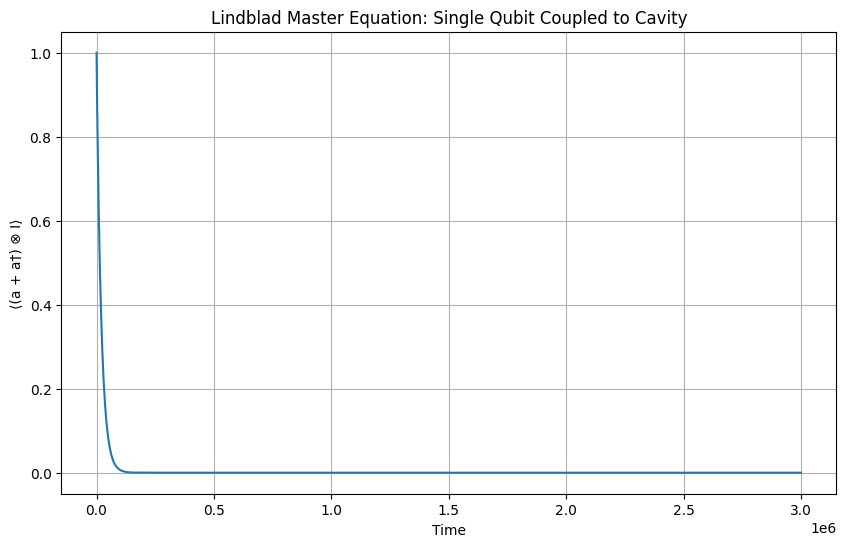

Initial expectation value: 1.0000
Final expectation value: -0.0000


In [47]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Define system parameters
N_cavity = 3  # Cavity Fock space cutoff
gamma_qubit_down = 1/2e4  # Qubit decay rate (sigma-)
gamma_qubit_up = gamma_qubit_down  # Qubit excitation rate (sigma+)

# Define operators
# Cavity operators
a = qt.tensor(qt.qeye(2), qt.destroy(N_cavity))  # Cavity annihilation
a_dag = qt.tensor(qt.qeye(2), qt.create(N_cavity))  # Cavity creation

# Qubit operators
sigma_minus = qt.tensor(qt.sigmap(), qt.qeye(N_cavity))  # Qubit lowering
sigma_plus = qt.tensor(qt.sigmam(), qt.qeye(N_cavity))   # Qubit raising

# Hamiltonian (set to zero as requested)
chi = -4*1e-3
H = chi*a_dag*a*sigma_plus*sigma_minus

# Collapse operators (dissipators)
c_ops = [
    np.sqrt(gamma_qubit_down) * sigma_minus+np.sqrt(gamma_qubit_up) * sigma_plus  # Qubit decay
          # Qubit excitation
]

# Initial state: cavity in coherent state |+⟩ (superposition), qubit in ground state |0⟩
psi_qubit = qt.basis(2, 0)  # Ground state
psi_cavity = (qt.basis(N_cavity, 1) + qt.basis(N_cavity, 0))/np.sqrt(2)
# psi_cavity = qt.basis(N_cavity, 1)
psi0 = qt.tensor(psi_qubit, psi_cavity)

# Expectation operator: (a + a†) ⊗ I (fixed dimension mismatch)
expect_op = a_dag + a

# Time evolution parameters
tlist = np.linspace(0, 3000000, 10000)

# Solve master equation
result = qt.mesolve(H, psi0, tlist, c_ops, [expect_op])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(tlist, result.expect[0])
plt.xlabel('Time')
plt.ylabel('⟨(a + a†) ⊗ I⟩')
plt.title('Lindblad Master Equation: Single Qubit Coupled to Cavity')
plt.grid(True)
plt.show()

print(f"Initial expectation value: {result.expect[0][0]:.4f}")
print(f"Final expectation value: {result.expect[0][-1]:.4f}")


Fitted parameters:
Decay time τ: 19997.67


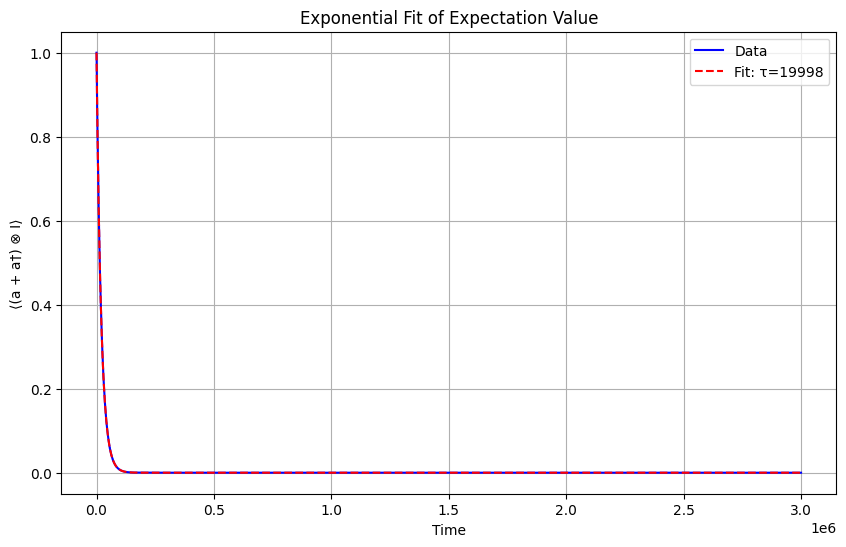

array([ 1.00000000e+00,  9.96686702e-01,  9.78898964e-01, ...,
       -7.12049027e-08, -3.55810098e-06, -2.55376120e-06], shape=(10000,))

In [48]:
# Fit the expectation values with exponential decay
from scipy.optimize import curve_fit

def exponential_decay(t, tau):
    return np.exp(-t/tau)

# Get the data
t_data = tlist
y_data = result.expect[0]

# Fit the exponential
popt, pcov = curve_fit(exponential_decay, t_data, y_data, p0=[1000000])

tau_fit = popt[0]

print(f"Fitted parameters:")
print(f"Decay time τ: {tau_fit:.2f}")

# Plot the fit
plt.figure(figsize=(10, 6))
plt.plot(t_data, y_data, 'b-', label='Data')
plt.plot(t_data, exponential_decay(t_data, tau_fit), 'r--', label=f'Fit: τ={tau_fit:.0f}')
plt.xlabel('Time')
plt.ylabel('⟨(a + a†) ⊗ I⟩')
plt.title('Exponential Fit of Expectation Value')
plt.legend()
plt.grid(True)
plt.show()

result.expect[0]

In [49]:
sigma_plus

Quantum object: dims=[[2, 3], [2, 3]], shape=(6, 6), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]